In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stunting_wasting_dataset (1).csv to stunting_wasting_dataset (1) (1).csv


In [ ]:
df = pd.read_csv('stunting_wasting_dataset (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={
               'Jenis Kelamin': 'jenis_kelamin',
                'Umur (bulan)': 'umur_bulan',
                'Tinggi Badan (cm)': 'tinggi_cm',
                'Berat Badan (kg)': 'berat_kg',
                'Stunting':'stunting',
                'Wasting': 'wasting'
                })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


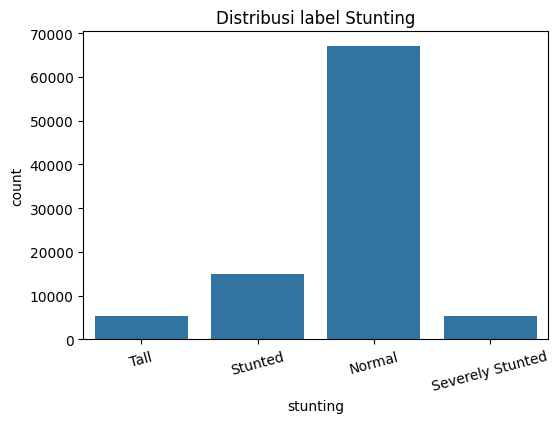

In [ ]:
plt.figure(figsize = (6, 4) )
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [ ]:
stunting_cat = df['stunting'].astype('category')
stunting_classes_names = list(stunting_cat.cat.categories) # Store original string labels in the correct order
df['stunting'] = stunting_cat.cat.codes

# Fitur kategorikal lain (jenis kelamin, westing) kode also
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


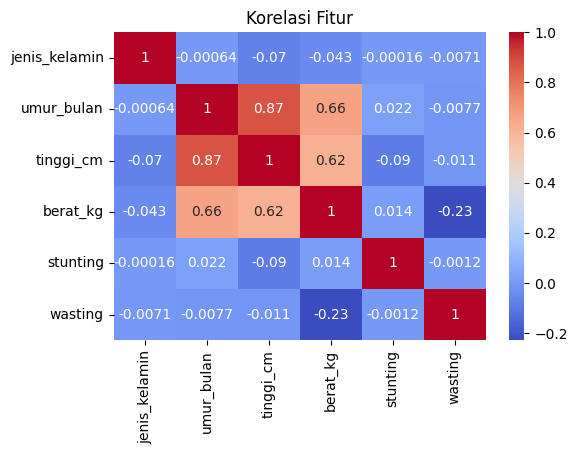

In [ ]:
plt.figure(figsize = (6, 4) )
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
x = df[feature_cols]
y = df['stunting']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(x_train), len(x_test)

(74153, 18539)

In [ ]:
dt = DecisionTreeClassifier(
criterion='gini',
max_depth=4,
random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Evaluasi
y_pred = dt.predict(x_test)

# Map integer predictions back to original string labels
y_test_labels = [stunting_classes_names[i] for i in y_test]
y_pred_labels = [stunting_classes_names[i] for i in y_pred]


print("Akurasi:", round(accuracy_score(y_test, y_pred) *100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test_labels, y_pred_labels # Use the mapped string labels
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



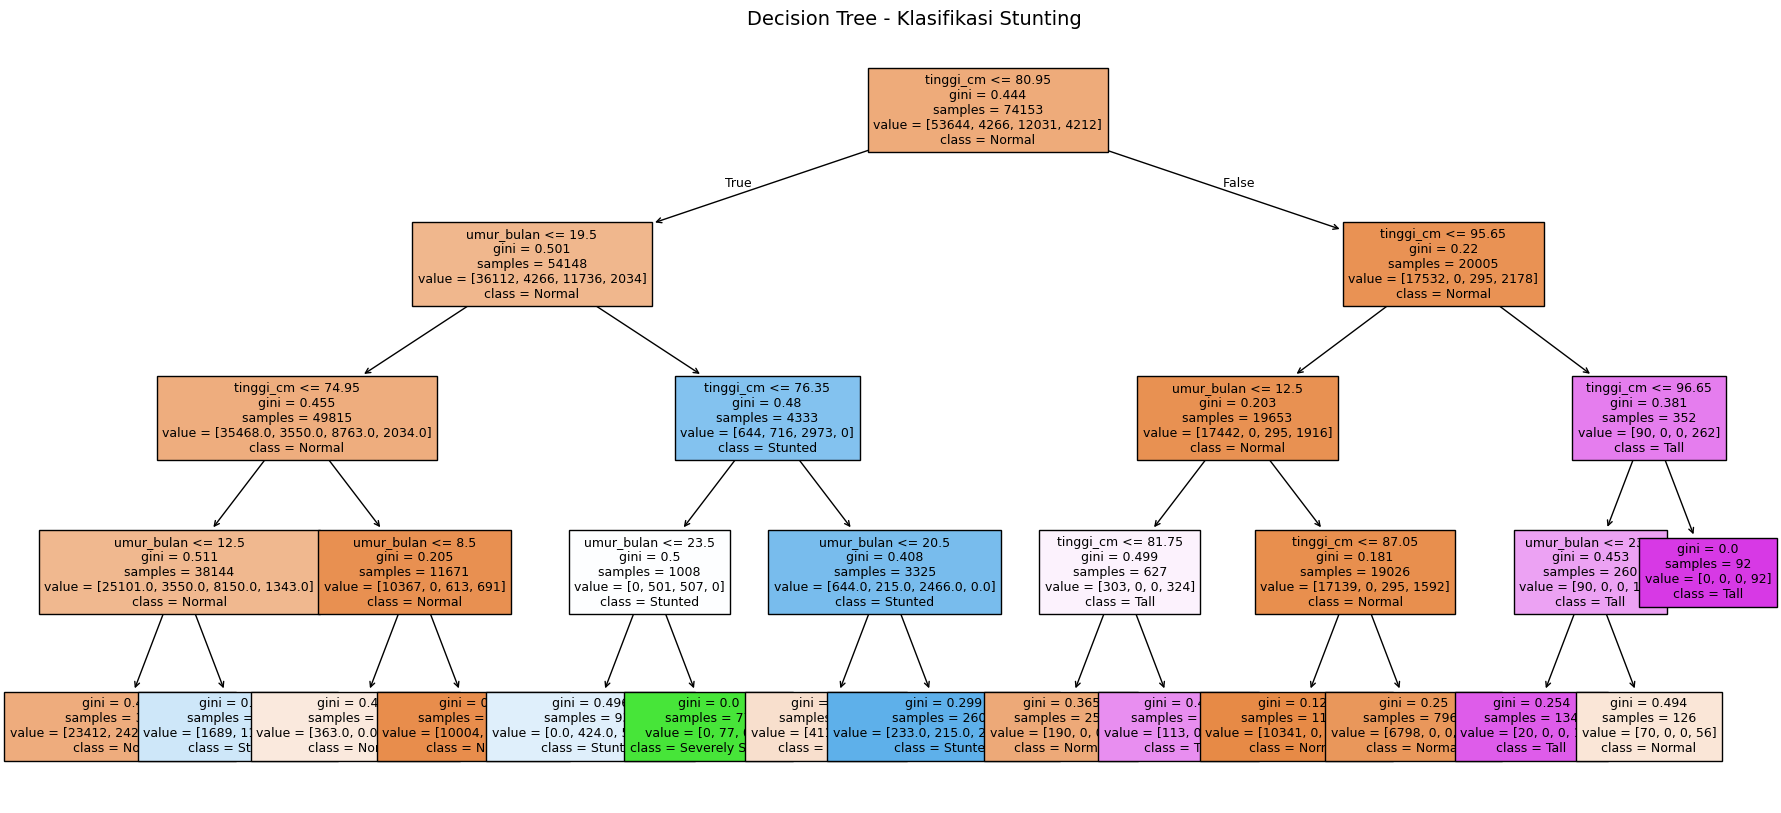

In [ ]:
# Visualisasi Decision Tree
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes_names,  # <--- pastikan ini string
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting", fontsize=14)
plt.show()


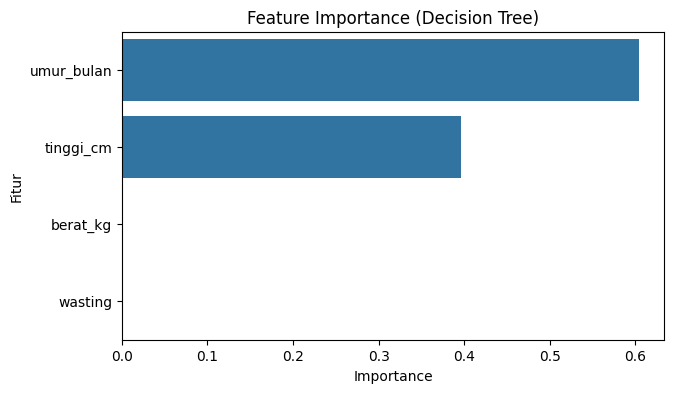

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [ ]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values (ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [ ]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(x_train, y_train)
    scores [d] = accuracy_score(y_test, m.predict(x_test))
scores
best_d = max (scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores [best_d]*100,2), "%")

Best max_depth: 8 | Acc: 84.22 %
